In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from IPython.display import display, Image
import os
import PIL.Image
from sklearn.cross_validation import train_test_split
import pandas as pd

c:\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Displaying Some Images : 

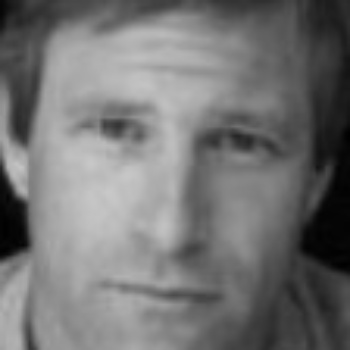

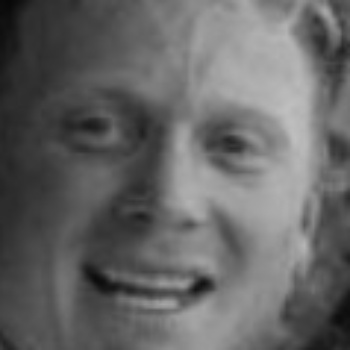

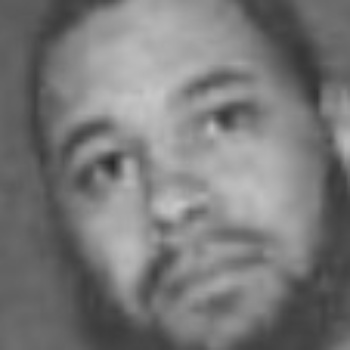

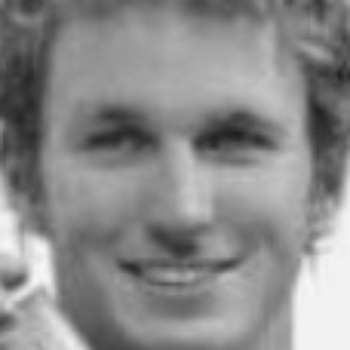

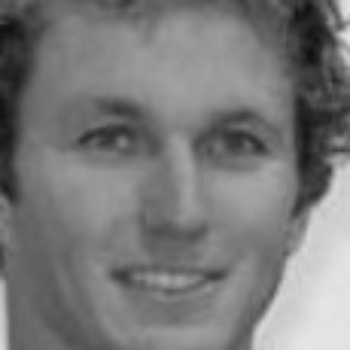

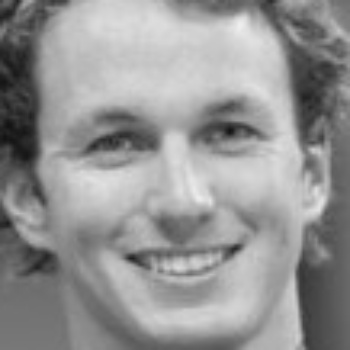

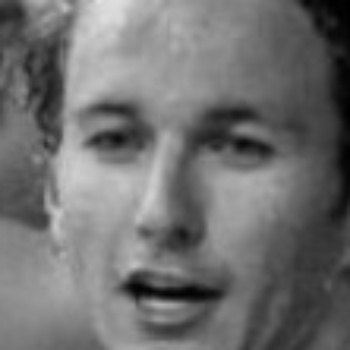

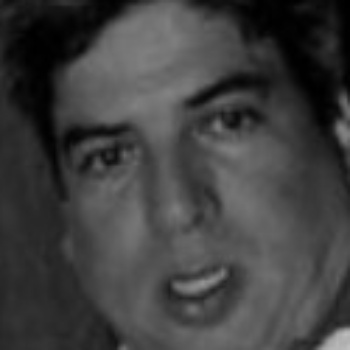

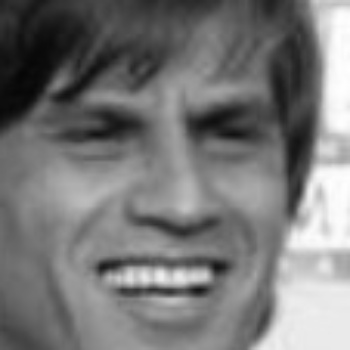

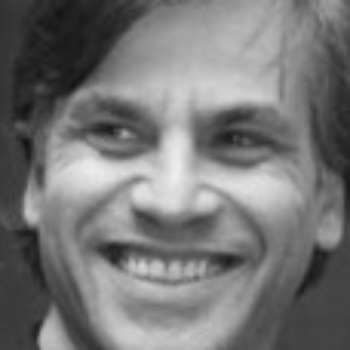

In [8]:

a = os.listdir("data/images") 															#To display first ten images.
for i in range(10):
	display(Image(filename = "data/images/"+a[i]))

Loading the dataset into numpy arrays:

In [4]:
image_size = 350
"""
filelist   = os.listdir("data/images")
x = np.array([np.array(PIL.Image.open("data/images/"+fname)) for fname in filelist])
print(x.shape)
x.dump('file.npy')"""
filelist   = os.listdir("data/images")
filelist[0:10]

['Aaron_Eckhart_0001.jpg',
 'Aaron_Guiel_0001.jpg',
 'Aaron_Patterson_0001.jpg',
 'Aaron_Peirsol_0001.jpg',
 'Aaron_Peirsol_0002.jpg',
 'Aaron_Peirsol_0003.jpg',
 'Aaron_Peirsol_0004.jpg',
 'Aaron_Pena_0001.jpg',
 'Aaron_Sorkin_0001.jpg',
 'Aaron_Sorkin_0002.jpg']

Load Images Saved in file.npy : 
--

In [5]:
x = np.load('file.npy')
print(x[0].shape)

(350, 350)


Load Necessary Tags :
--

In [9]:
data = pd.read_csv("data/legend.csv", usecols = [1,2])
data.head(10)

,image,emotion
0,facial-expressions_2868588k.jpg,anger
1,facial-expressions_2868585k.jpg,surprise
2,facial-expressions_2868584k.jpg,disgust
3,facial-expressions_2868582k.jpg,fear
4,Aaron_Eckhart_0001.jpg,neutral
5,Aaron_Guiel_0001.jpg,happiness
6,Aaron_Patterson_0001.jpg,neutral
7,Aaron_Peirsol_0001.jpg,happiness
8,Aaron_Peirsol_0002.jpg,happiness
9,Aaron_Peirsol_0003.jpg,happiness


In [10]:
data.head(3)
data['emotion']=data['emotion'].str.lower()
data['emotion']

0            anger
1         surprise
2          disgust
3             fear
4          neutral
5        happiness
6          neutral
7        happiness
8        happiness
9        happiness
10         neutral
11         neutral
12       happiness
13       happiness
14         neutral
15         neutral
16       happiness
17         neutral
18         neutral
19         neutral
20         neutral
21         neutral
22       happiness
23         neutral
24       happiness
25         neutral
26         neutral
27         neutral
28         neutral
29         neutral
           ...    
13660    happiness
13661    happiness
13662    happiness
13663    happiness
13664    happiness
13665    happiness
13666    happiness
13667    happiness
13668    happiness
13669    happiness
13670    happiness
13671    happiness
13672    happiness
13673    happiness
13674    happiness
13675    happiness
13676    happiness
13677    happiness
13678    happiness
13679    happiness
13680    happiness
13681    hap

In [18]:
dictn = data.set_index('image').to_dict()
dictn = dictn['emotion']
dictn

{'Carrie-Anne_Moss_0003.jpg': 'happiness',
 'Bela_Karolyi_0001.jpg': 'happiness',
 'George_W_Bush_0175.jpg': 'neutral',
 'Monica_Seles_0004.jpg': 'happiness',
 'Thomas_Rupprath_0002.jpg': 'happiness',
 'Gerhard_Schroeder_0044.jpg': 'neutral',
 'Gloria_Macapagal_Arroyo_0024.jpg': 'neutral',
 'Ren_Qingjin_0001.jpg': 'neutral',
 'Lindsay_Davenport_0017.jpg': 'happiness',
 'Rowan_Williams_0001.jpg': 'neutral',
 'HrithikRoshan_7.jpg': 'happiness',
 'Marcelo_Ebrard_0003.jpg': 'happiness',
 'Nasser_al-Kidwa_0002.jpg': 'neutral',
 'John_Malkovich_0002.jpg': 'neutral',
 'Rohinton_Mistry_0001.jpg': 'neutral',
 'Jennifer_Connelly_0003.jpg': 'neutral',
 'William_Ford_Jr_0007.jpg': 'happiness',
 'Kofi_Annan_0011.jpg': 'neutral',
 'George_W_Bush_0304.jpg': 'neutral',
 'Sharon_Osbourne_0001.jpg': 'neutral',
 'Lucy_Liu_0003.jpg': 'happiness',
 'Amelie_Mauresmo_0018.jpg': 'neutral',
 'Robert_Korzeniowski_0001.jpg': 'neutral',
 'Vin_Diesel_0002.jpg': 'neutral',
 'Hugo_Chavez_0009.jpg': 'sadness',
 'Nick

In [16]:
rawlabel = list(data['emotion'])
label = []
for i in rawlabel:
    var = 0
    if i=="anger":
        var = 1
    elif i=="surprise":
        var = 2
    elif i=="happiness":
        var = 3
    elif i =="neutral":
        var = 0
    elif i=="disgust":
        var = 4
    elif i=="fear":
        var = 5
    elif i=="contempt":
        var = 6
    else: #sadness
        var = 7 
    label.append(var)
Y = np.array(label)

import pickle
pickle_out = open("dict.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()
Y

array([1, 2, 4, ..., 3, 3, 3])

In [48]:
"""X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=1500, random_state=42)"""

ValueError: Found input variables with inconsistent numbers of samples: [13718, 13686]

In [20]:
X = []
Y = []
filelist   = os.listdir("data/images")
for i in filelist:
    try:
        X.append(np.array(PIL.Image.open("data/images/"+i)))
        Y.append(dictn[i])
    except KeyError:
        X.pop()
X
Y

['neutral',
 'happiness',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'happiness',
 'happiness',
 'happiness',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'surprise',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'happiness',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 '

In [21]:
X

[array([[  9,   9,   9, ...,  42,  41,  41],
        [  9,   9,   9, ...,  41,  41,  41],
        [  8,   8,   9, ...,  42,  41,  41],
        ...,
        [160, 160, 161, ...,  68,  69,  70],
        [159, 159, 160, ...,  67,  69,  69],
        [159, 159, 160, ...,  67,  69,  69]], dtype=uint8),
 array([[10, 10, 10, ..., 92, 93, 93],
        [10, 10, 10, ..., 91, 92, 93],
        [10, 10, 11, ..., 90, 91, 91],
        ...,
        [59, 58, 54, ..., 36, 36, 36],
        [61, 60, 56, ..., 38, 39, 39],
        [61, 60, 56, ..., 38, 39, 39]], dtype=uint8),
 array([[ 92,  92,  92, ..., 107, 107, 107],
        [ 92,  92,  92, ..., 107, 107, 107],
        [ 92,  92,  92, ..., 106, 106, 106],
        ...,
        [101, 101, 102, ..., 128, 129, 129],
        [101, 101, 102, ..., 129, 130, 130],
        [101, 101, 102, ..., 129, 130, 130]], dtype=uint8),
 array([[125, 125, 118, ..., 162, 166, 166],
        [124, 124, 117, ..., 161, 165, 166],
        [121, 121, 114, ..., 158, 162, 163],
       

In [25]:
len(X[0][0])

350